In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
wine_cols=['class',
'Alcohol',
'Malic acid',
'Ash',
'Alcalinity of ash'  ,
'Magnesium',
'Total phenols',
'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity',
'Hue',
'OD280/OD315 of diluted wines',
'Proline']

In [3]:
wine=pd.read_csv('/Users/kirillkotrikov/Downloads/wine/wine.data'
         ,header=None, names=wine_cols)

x,y=wine.iloc[:,1:].values,wine.iloc[:,0].values

In [4]:
ssc=StandardScaler()
x_std=ssc.fit_transform(x)

In [5]:
lda=LDA(n_components=2)

x_lda=lda.fit_transform(x_std,y)

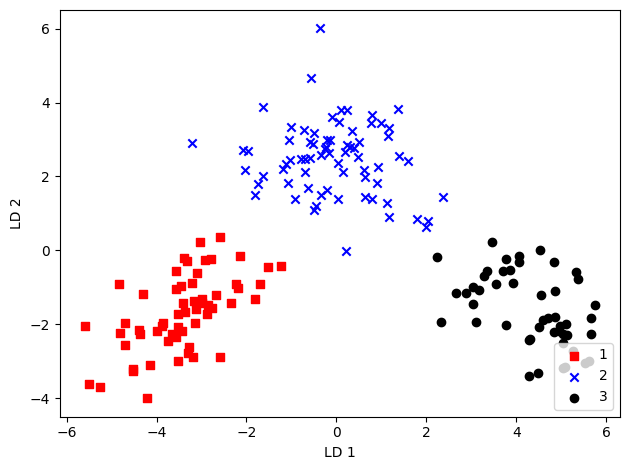

In [6]:
colors = ['r', 'b', 'black']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y), colors, markers):
     plt.scatter(x_lda[y==l, 0],
                 x_lda[y==l, 1] * (-1),
                 c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()

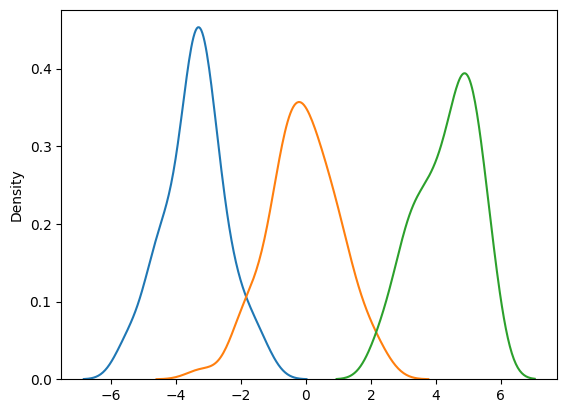

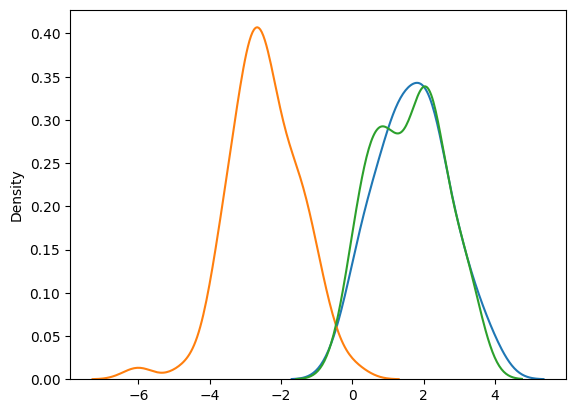

In [7]:
# density function plot showing class separatability moving to new dimension

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()

for i in np.unique(y):

    sns.kdeplot(x_lda[:,0][y==i],legend=None)

fig, ax = plt.subplots()

for i in np.unique(y):

    sns.kdeplot(x_lda[:,1][y==i],legend=None)
